# Homework 4

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from kmodes.kmodes import KModes

sns.set(style="whitegrid")
warnings.filterwarnings("ignore", category=FutureWarning)  # Optional: suppress warnings


### Preparing the dataset

In [2]:
# Define the dataset path
dataset_path = '../../datasets/accounts.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Select the first 8 features
df_selected = df.iloc[:, :8]

# Remove duplicates
df_selected = df_selected.drop_duplicates()

# Remove null values
df_selected = df_selected.dropna()

df_selected

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no
11157,33,blue-collar,single,primary,no,1,yes,no
11158,39,services,married,secondary,no,733,no,no
11159,32,technician,single,secondary,no,29,no,no


### Data preprocessing
We have categorical data that needs to be converted to numerical, so we can apply MinMaxScaler and StandardScaler.

In [3]:
# Columns to be encoded with one-hot encoding
one_hot_columns = ['job', 'marital', 'education', 'housing', 'loan']

# Columns to be encoded with binary encoding
binary_ordinal_columns = ['default', 'housing', 'loan']

# Columns to be encoded with ordinal encoding
ordinal_columns = ['education']



# Define the preprocessing steps for each type of column
pipeline = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_columns),
        ('binary', OrdinalEncoder(), binary_ordinal_columns),
        ('ordinal', OrdinalEncoder(categories=[["unknown", "primary", "secondary", "tertiary"]]), ordinal_columns)
    ],
    remainder='passthrough'
)
# Fit and transform the data
df_preprocessed = pipeline.fit_transform(df_selected)

# Print the preprocessed data
df_preprocessed.shape

(10316, 29)

### Exercise 1

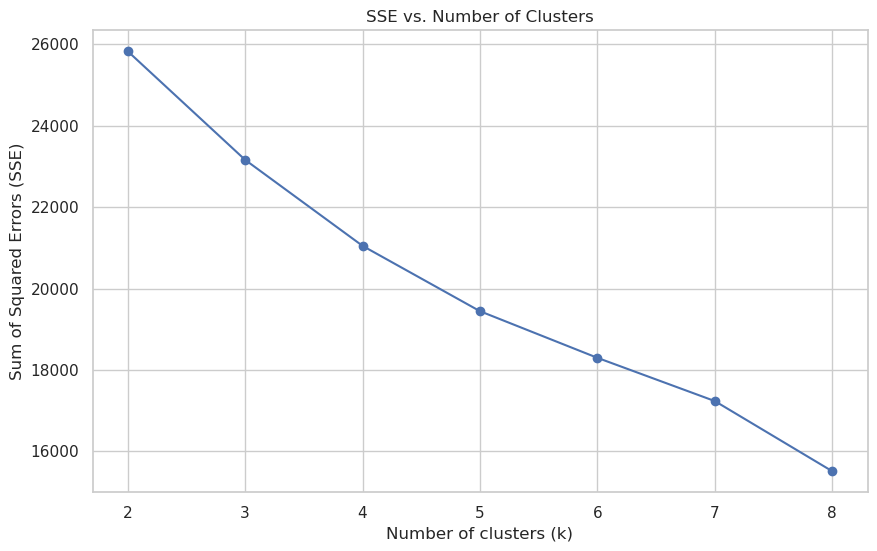

In [4]:
# Normalize the data
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_preprocessed)

# Apply K-means clustering with different values of k
sse = []
k_values = range(2, 9)
for kmeans in k_values:
    kmeans = KMeans(n_clusters=kmeans, max_iter=500, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

Usually to determine the optimal number of clusters, we look for an elbow point and assume that the number of clusters in that point is the optimal. An elbow point happens when the rate of decrease in SSE slowd down. This means that adding more clusters will only decrease SSE by a small fraction. As we can see in this plot, the elbow point is when k = 5. Using this method, for this data set, the optimal number of clusters is 5.

### K-modes

K-modes strength is categorical data. Instead of measuring the euclidean distance, it counts how many categories differ between datapoints (hamming distance). K means computes the average of each coordinate of each datapoint in the cluster to calculate the centroid whereas K-modes calculates the most common category for each variable in all dapoints in the cluster. 
In this dataset there are 2 numerical variables and 6 categorical variables.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3014, cost: 37899.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2179, cost: 35082.0
Run 1, iteration: 2/100, moves: 177, cost: 35082.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2890, cost: 34200.0
Run 1, iteration: 2/100, moves: 90, cost: 34200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2305, cost: 32901.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2509, cost: 32795.0
Run 1, iteration: 2/100, moves: 2563, cost: 32728.0
Run 1, iteration: 3/100, moves: 15, cost: 32728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1179, cost: 34138.0
Init:

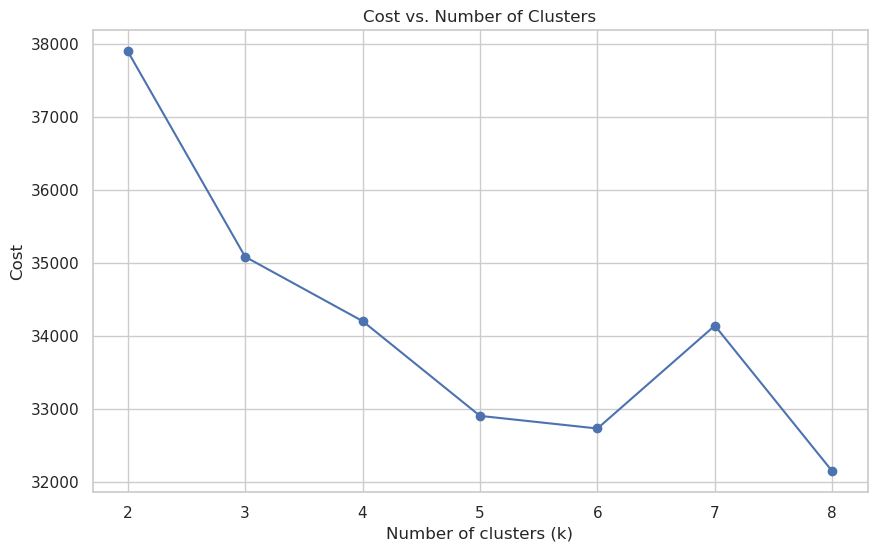

In [5]:
# Apply K-modes clustering with different values of k
cost = []
k_values = range(2, 9)
for kmeans in k_values:
    kmodes = KModes(n_clusters=kmeans, init='Huang', n_init=1, verbose=1, random_state=42)
    clusters = kmodes.fit_predict(df_selected)
    cost.append(kmodes.cost_)

# Plot the cost for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cost, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

## K-means or K-modes?

In this case, the results were contrary to the predictions. Despite having a dataset that is mostly categorical, where K-modes usually outperforms K-means, this was not the case. There are some possible reasons. The first one is that the numerical variables combined with education which is ordinal might have major importance which makes this problem better suited for K-means algorithm.


/tmp/ipykernel_12691/1988153052.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca[:, 0], df_pca[:, 1], s=50, cmap='viridis')


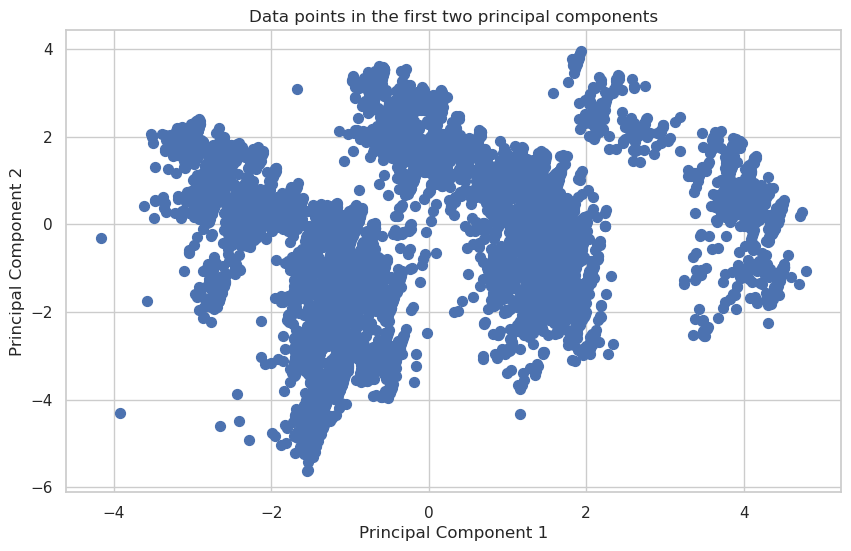

In [6]:
# Encode varibles using the previous pipeline
df_preprocessed_pca = pipeline.fit_transform(df_selected)

# Normalize the data with Standard Scaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_preprocessed_pca)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)

# Fit and transform the data
df_pca = pca.fit_transform(df_normalized)

# Plot the data points in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points in the first two principal components')
plt.grid(True)  # Add grid for better readability  
plt.show()

### K-means on the original dataset

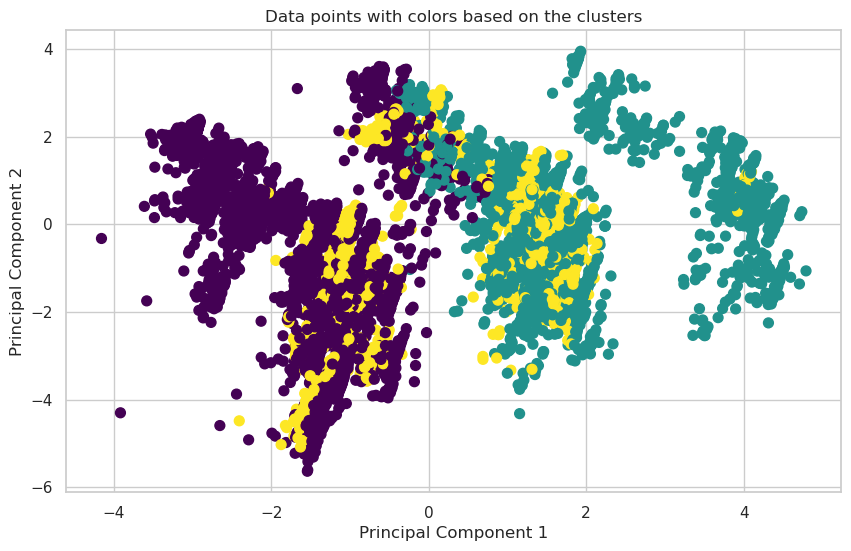

In [11]:
# Apply K-means clustering with k=3 and random_state=42
kmeans = KMeans(n_clusters=3, random_state=42)
clusters1 = kmeans.fit_predict(df_normalized)

# Plot the data points with colors based on the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters1, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points with colors based on the clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

Even though we can clearly separate visually the 2 clusters, there are 6 vatiables that are hidden so K-means algorithm will not only account for these 2 variables and separate the visually.

### K-means on the dataset after PCA

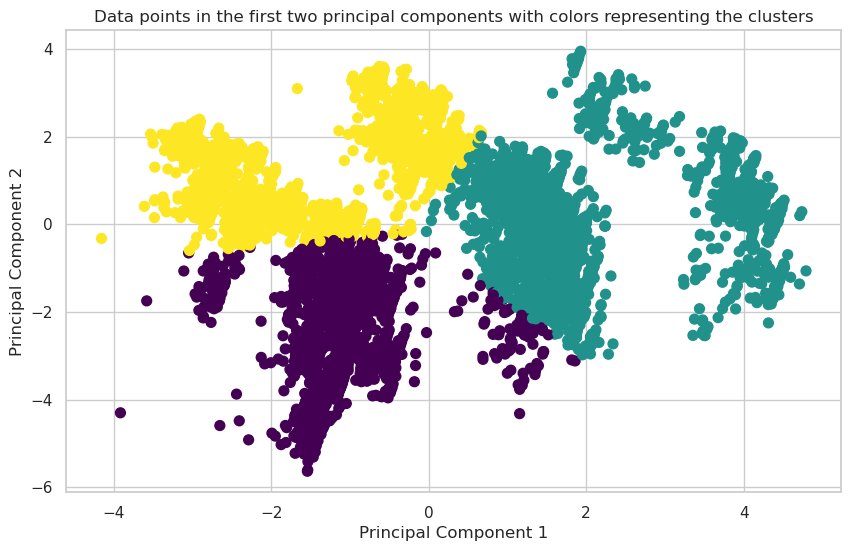

22424.783412717472

In [12]:
# Compute the variability explained by the principal components
pca.explained_variance_ratio_

# Apply K-means clustering with k=3 and random_state=42 and randomly initialize centroids, make several runs and choose the best fitting
kmeans = KMeans(n_clusters=3, init="random", n_init=30, random_state=42)
clusters2 = kmeans.fit_predict(df_pca)


# Plot the data points in the first two principal components with colors representing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters2, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points in the first two principal components with colors representing the clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

# Print SSE score
kmeans.inertia_

As we can see, although this distribution of the clusters may have a relatively low SSE score, the clusters are not circular (would suit euclidean distance the best) and that brings limitations to using euclidean distance in this particular case. Another way of improving the model efficiency than changing distance function is to manually initialize the centroids, this is possible in this case because the number of dimensions is low.

Initialization complete
Iteration 0, inertia 45510.24385354841.
Iteration 1, inertia 35070.27039680378.
Iteration 2, inertia 34846.365243662876.
Iteration 3, inertia 34756.129514227745.
Iteration 4, inertia 34718.34012228781.
Iteration 5, inertia 34713.54515517331.
Iteration 6, inertia 34712.78142430903.
Converged at iteration 6: center shift 7.455096298462654e-05 within tolerance 0.0003313984535172553.


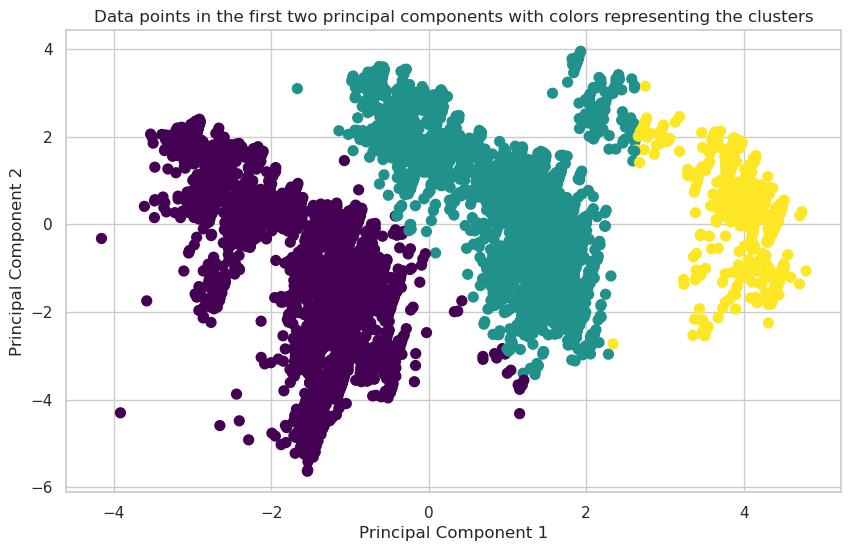

34712.72626028497

In [13]:
# Apply K-means clustering with k=3, random_state=42 and manually defined centroids
centroids = np.array([[-2, -2], [1, 0], [4, 2]])
kmeans = KMeans(n_clusters=3, init=centroids, n_init=1, verbose=1, random_state=42) 
clusters3 = kmeans.fit_predict(df_pca)

# Plot the data points in the first two principal components with colors representing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters3, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points in the first two principal components with colors representing the clusters')
plt.grid(True)  # Add grid for better readability
plt.show()

# Print SSE score
kmeans.inertia_

As we can see, despite the second plot having a much clear cluster separation, it had higher SSE score than the first one. This shows the limitations of always using euclidean distance in K-Means.

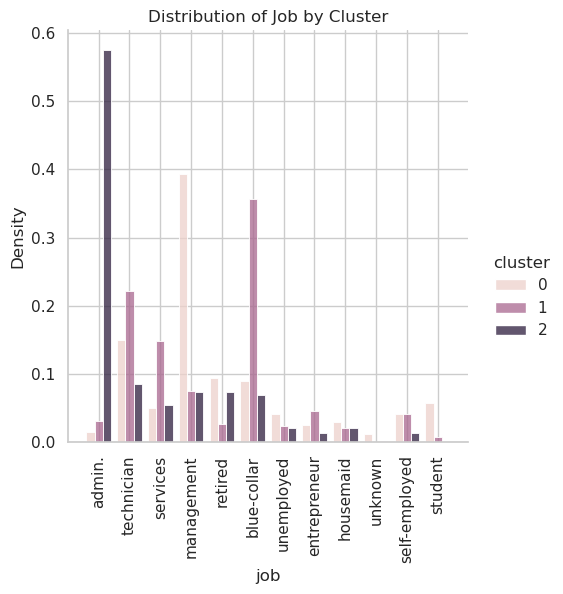

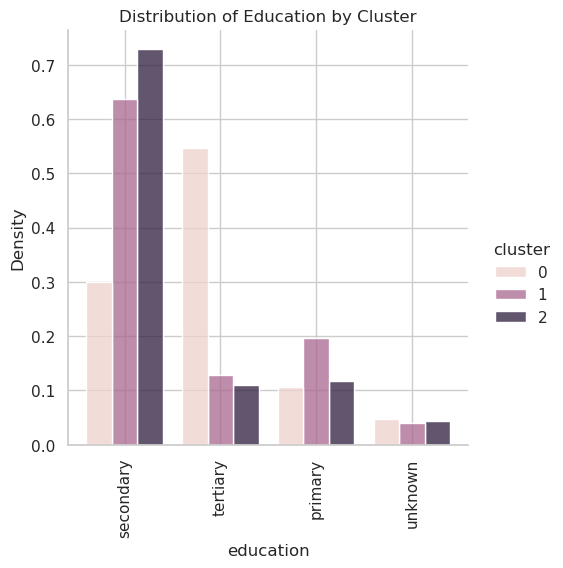

In [16]:
# Add the cluster labels to the original dataframe
df_selected['cluster'] = clusters1

# Plot the distribution of "job" according to the clusters
sns.displot(df_selected, x="job", hue="cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Job by Cluster')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of "education" according to the clusters
sns.displot(df_selected, x="education", hue="cluster", multiple="dodge", stat='density', shrink=0.8, common_norm=False)
plt.title('Distribution of Education by Cluster')
plt.xticks(rotation=90)
plt.show()

## Description
If we split __Cluster 0__ by education level, the higher the education, the larger the percentage within the cluster. The percentage of observations whose education is unknown is low. There is 1 profession that clearly dominates the cluster, __management__, with close to __40%__ of representation, followed by __technician__ with __15%__. All other professions do not have major differences between each other in terms of representation and __all fall below the 10%__.

In __Cluster 1__, the most represented job is __blue collar__, followed by __technician__ and then __services__. Similarly to the previous cluster, all other jobs are underrepresented, __most do not even reach 5%__. Both primary and tertiary education are underrepresented. __Secondary school education__ dominates by far with little above __60%__. 

Finally, __Cluster 2__ is overrepresented by __secondary school education__ with numbers slightly higher than 70%. __Tertiary and primary school education__ are similarly represented, the percentage of observation with __unknown education__ is less than __5%__. __Administrators__ make more than half of observations of this group. The rest of the jobs have reprentations below __10%__.